In [25]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')


This is an analysis of the RAWFC dataset

In [2]:
def create_RAWFC_df(folder_path):

    dfs = []
    for file_name in os.listdir(folder_path):

        with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
            data = json.load(file)

            df = pd.json_normalize(data, max_level=3)
            dfs.append(df)

    return pd.concat(dfs, ignore_index=True)

train_df = create_RAWFC_df("../RAWFC/train")
test_df = create_RAWFC_df("../RAWFC/test")
val_df = create_RAWFC_df("../RAWFC/val")




RAWFC Dataset columns: ['event_id' 'claim' 'original_label' 'label' 'explain' 'reports']
training set has 521 claims
test set has 200 claims
val set has 200 claims 

original_label
mixture                293
true                   234
unproven               150
false                  129
Mostly True             50
correct attribution     36
Mostly False            26
misattributed            3
Name: count, dtype: int64


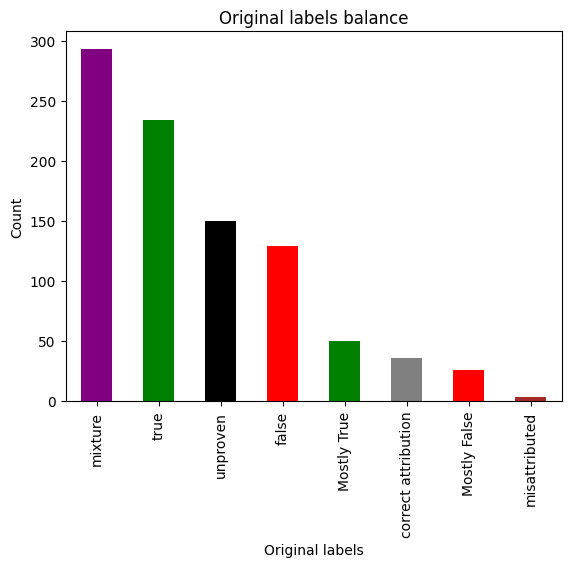

label
half     443
true     320
false    158
Name: count, dtype: int64


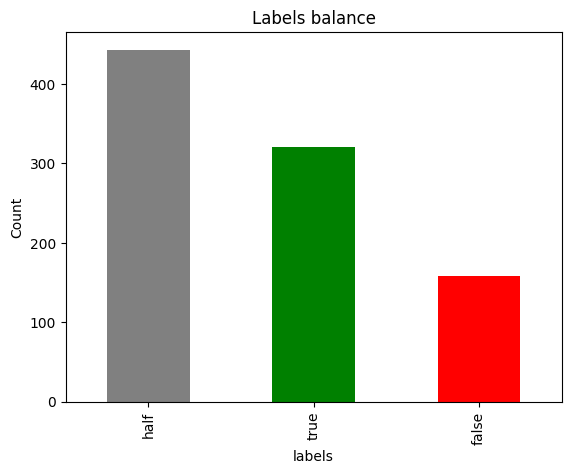

In [47]:
df = pd.concat([train_df, test_df, val_df])
print(f'RAWFC Dataset columns: {train_df.columns.values}')

# 1. train, test, val set sizes
print(f'training set has {len(train_df.index)} claims')
print(f'test set has {len(test_df.index)} claims')
print(f'val set has {len(val_df.index)} claims \n')

# 2. Original label balance
label_counts = df['original_label'].value_counts()
print(label_counts)
label_counts.plot(kind='bar', color=['purple', 'green', 'black', 'red', 'green', 'grey', 'red', 'brown'])
plt.xlabel('Original labels')
plt.ylabel('Count')
plt.title('Original labels balance')
plt.show()

# 3. label balance
label_counts = df['label'].value_counts()
print(label_counts)
label_counts.plot(kind='bar', color=['grey', 'green', 'red'])
plt.xlabel('labels')
plt.ylabel('Count')
plt.title('Labels balance')
plt.show()



In [28]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

all_text = ' '.join(df['claim'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word.lower() not in stop_words])))

word_counts = Counter(all_text.split())

most_common_words = word_counts.most_common(50)
print(most_common_words)

[('President', 154), ('U.S.', 153), ('Trump', 146), ('Donald', 116), ('show', 111), ('said', 61), ('photograph', 59), ('video', 39), ('child', 35), ('would', 33), ('people', 31), ('COVID-19', 30), ('2018,', 29), ("Trump's", 28), ('school', 28), ('used', 26), ('2020', 26), ('Obama', 23), ('police', 23), ('woman', 22), ('New', 22), ('order', 21), ('House', 21), ('new', 21), ('2019,', 21), ('million', 20), ('Joe', 20), ('man', 20), ('Rep.', 20), ('campaign', 20), ('wearing', 19), ('shooting', 18), ('2018', 18), ('white', 17), ('killed', 17), ('two', 17), ('June', 17), ('American', 17), ('2019.', 17), ('announced', 16), ('protest', 16), ('family', 16), ('border', 16), ('administration', 16), ('found', 16), ('called', 16), ('Biden', 16), ('Sen.', 16), ('government', 16), ('year', 15)]


Pros:
- Claims have clear context.
- Presence of useful columns (s.a explanations, link, etc.) to evaluate decomposition and retrieval
- Presence of 'sentence'/modular decomposition of evidence
- Evidence-based from fact-verification site (Snopes) similar to Politifact
Cons: 
- Huge disbalance between half >> true >> false


This is an analysis of the Fake_Real dataset

Fake_Real Dataset columns: ['index' 'text' 'subject' 'target']


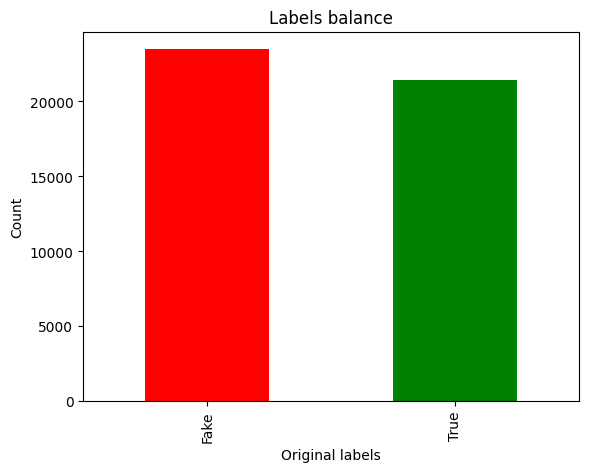

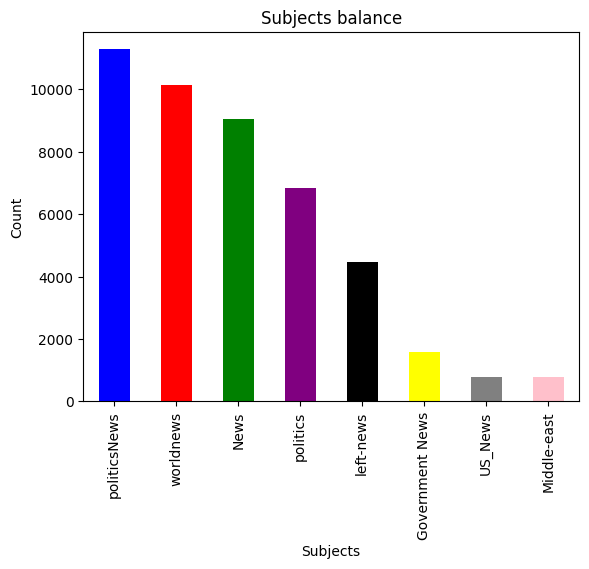

In [36]:
df = pd.read_csv("../Fake_Real/Fake_Real.csv", header=0)
print(f'Fake_Real Dataset columns: {df.columns.values}')


label_counts = df['target'].value_counts()
label_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Original labels')
plt.ylabel('Count')
plt.title('Labels balance')
plt.show()

subject_counts = df['subject'].value_counts()
subject_counts.plot(kind='bar', color=['blue', 'red', 'green', 'purple', 'black', 'yellow', 'grey', 'pink'])
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.title('Subjects balance')
plt.show()



In [34]:
all_text = ' '.join(df['text'].astype(str))
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(all_text.lower())  # Tokenize and convert to lowercase

filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]

word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(50)
print(most_common_words)



[('said', 130050), ('trump', 127688), ('us', 63156), ('would', 54945), ('president', 51949), ('people', 41195), ('one', 35568), ('state', 32250), ('also', 31174), ('new', 30921), ('reuters', 28766), ('donald', 27554), ('clinton', 27422), ('house', 27092), ('obama', 26955), ('government', 26896), ('states', 26086), ('republican', 24324), ('could', 23899), ('united', 23538), ('told', 23344), ('white', 22212), ('like', 22112), ('campaign', 21158), ('last', 20408), ('news', 20094), ('two', 19931), ('party', 19897), ('time', 19562), ('election', 19471), ('first', 18542), ('washington', 17895), ('former', 17664), ('even', 17570), ('year', 17517), ('country', 17448), ('many', 16411), ('hillary', 16251), ('years', 15990), ('security', 15693), ('may', 15432), ('media', 15376), ('political', 15250), ('national', 15249), ('say', 15201), ('made', 14875), ('get', 14746), ('law', 14709), ('police', 14581), ('make', 14537)]


Pros:
- Label balance
- All political statements
- References before GPT model's knowledge cutoff
Cons: 
- No methodology indication
- Poor/Maybe not reliable source
